In [1]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#defining folder path
path = r'/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/04 Python/00 Instacart'

In [3]:
# importing pickle
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust.pkl'))

In [4]:
ords_prods_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329.0,1,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795.0,1,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747.0,1,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736.0,1,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534.0,1,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32435059 entries, 0 to 32435058
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                float64 
 1   user_id                 int64   
 2   order_number            float64 
 3   orders_day_of_week      float64 
 4   order_hour_of_day       float64 
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   product_name            object  
 10  aisle_id                float64 
 11  department_id           float64 
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  Busiest_days            object  
 17  busiest_hours           object  
 18  max_order               float64 
 19  loyalty_flag            object  
 20  spending_flag           object  
 21  avg_pr

Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

First_name and surname can be considered PII data and should be removed before sharing any data.

In [6]:
#dropping columns
ords_prods_cust.drop(columns=['first_name', 'surname'], inplace=True)

In [7]:
#checking shape
ords_prods_cust.shape

(32435059, 31)

In [8]:
#checking columns
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'spending_flag', 'avg_price', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income'],
      dtype='object')

### Creating regions

The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [9]:
ords_prods_cust['state'].value_counts()

Pennsylvania            667738
California              660428
Rhode Island            657662
Georgia                 657092
New Mexico              655188
Arizona                 654553
North Carolina          652329
Oklahoma                652275
Alaska                  649026
Minnesota               648424
Massachusetts           647020
Wyoming                 644927
Virginia                642103
Missouri                641323
Texas                   641051
Colorado                639820
Maine                   639175
North Dakota            638997
Alabama                 638650
Louisiana               638179
Kansas                  638021
Delaware                637477
South Carolina          637423
Oregon                  636966
Arkansas                636737
New York                636707
Nevada                  636697
Montana                 635838
South Dakota            634362
Illinois                633476
Hawaii                  633446
Washington              633445
Mississi

In [10]:
# creating list of states
region_northeast = ['Maine', 'New Hampshire','Vermont'
,'Massachusetts','Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [11]:
region_northeast

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [12]:
region_midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [13]:
region_south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']


In [14]:
region_west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [15]:
# creating an ordered list with tolist
allstates = ords_prods_cust['state'].tolist()

In [16]:
#assigning flags to list
flags = []

In [17]:
# assigning
for row in allstates:
    if row in region_northeast:
        flags.append('Northeast')
    elif row in region_midwest:
        flags.append('Midwest')
    elif row in region_south:
        flags.append('South')
    elif row in region_west:
        flags.append('West')
    else: print('No region match')

In [18]:
# creating column from flags
ords_prods_cust['region'] = flags

In [19]:
#checking output for missing values
ords_prods_cust['region'].value_counts()

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: region, dtype: int64

Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [20]:
# using crosstab to check spending per region
region_spends = pd.crosstab(ords_prods_cust['region'], ords_prods_cust['spending_flag'], dropna = False)

In [21]:
region_spends

spending_flag,High spender,Low spender
region,,
Midwest,2497034,5100291
Northeast,1875170,3847566
South,3549625,7242260
West,2722093,5570820


In [22]:
# copying for analysis to excel
region_spends.to_clipboard()

The high spender to total customer base ratio is almost equal across all regions (33%). The highest amount of customers are in the South region (33.3%).

### Low-activity customers

The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# creating a new df with low activity customer excluded
ords_prods_cust_low_activity_excluded = ords_prods_cust[ords_prods_cust['max_order'] >=5]

In [24]:
ords_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_low_activity_excluded.pkl'))

TimeoutError: [Errno 60] Operation timed out: '/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/04 Python/00 Instacart/02 Data/Prepared Data/ords_prods_cust_low_activity_excluded.pkl'

In [25]:
ords_prods_cust_low_activity_excluded.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,region
0,2539329.0,1,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795.0,1,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747.0,1,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736.0,1,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534.0,1,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [26]:
ords_prods_cust_low_activity_excluded.shape

(30993489, 32)

In [ ]:
ords_prods_cust.shape

In [ ]:
ords_prods_cust_low_activity_excluded['max_order'].min()

### Marketing and business strategy

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. 

In [27]:
ords_prods_cust.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,order_frequency,age,n_dependants,income
count,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.035696e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07,3.243506e+07
mean,1.710748e+06,1.029372e+05,1.714195e+01,2.738815e+00,1.342498e+01,1.110414e+01,2.557635e+04,8.351081e+00,5.896955e-01,7.119612e+01,9.919792e+00,1.198023e+01,3.305231e+01,1.197850e+01,1.039779e+01,4.946512e+01,1.501877e+00,9.943550e+04
std,9.873006e+05,5.946651e+04,1.753496e+01,2.090051e+00,4.246357e+00,8.778941e+00,1.409657e+04,7.126656e+00,4.918889e-01,3.821139e+01,6.281485e+00,4.956554e+02,2.515463e+01,8.321715e+01,7.131238e+00,1.848555e+01,1.118869e+00,4.305540e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.559430e+05,5.142000e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353200e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387179e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700200e+04
50%,1.711047e+06,1.026110e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824742e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661200e+04
75%,2.565514e+06,1.543910e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.253968e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279080e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,9.999900e+04,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [28]:
ords_prods_cust['department_id'].value_counts()

4.0     9479291
16.0    5398747
19.0    2887550
7.0     2688123
1.0     2234743
13.0    1875369
3.0     1172428
15.0    1068058
20.0    1051249
9.0      866627
17.0     738666
12.0     708927
14.0     703033
11.0     447572
18.0     423802
6.0      269253
5.0      153696
8.0       97716
21.0      69145
2.0       36291
10.0      34573
Name: department_id, dtype: int64

Age: 
   - Young (<=34)
   - Midage (35-64)
   - Senior (>=65)

Income:
   - Low (<50000)
   - Mid (>=50000 AND <120000)
   - High (>=120000)
   
Goods:
-    Drinks_alcohol (have bought from department 5 'alcohol')
-    No_alcohol (have not bought from department 5) 

Number of dependants:
-    Parent (n_dependants >=1) 
 -   No_kids (n_dependants =0) 

#### Age flag

In [29]:
### creating flag for age
flag_age = []
for row in ords_prods_cust['age'].tolist():
    if row <= 34:
        flag_age.append('Young')
    elif row > 34 and row < 65:
        flag_age.append('Midage')
    elif row >= 65:
        flag_age.append('Senior')
    else:
        print('No age match', row)

In [30]:
ords_prods_cust['age_category'] = flag_age

In [31]:
ords_prods_cust['age_category'].value_counts()

Midage    15216519
Young      8635731
Senior     8582809
Name: age_category, dtype: int64

#### Income flag

In [32]:
# creating flag for income

flag_income = []
for row in ords_prods_cust['income'].tolist():
    if row < 50000:
        flag_income.append('Low')
    elif row >= 50000 and row < 120000:
        flag_income.append('Mid')
    elif row >= 120000:
        flag_income.append('High')
    else:
        print('No income match', row)

In [33]:
ords_prods_cust['income_category'] = flag_income

In [34]:
ords_prods_cust['income_category'].value_counts()

Mid     19257305
High     9579809
Low      3597945
Name: income_category, dtype: int64

#### Alcohol flag

In [35]:
#crosstabbing department_id and user_id
crosstab_alcohol = pd.crosstab(ords_prods_cust['department_id'], ords_prods_cust['user_id'], dropna = False)

In [36]:
crosstab_alcohol.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,206200,206201,206202,206203,206204,206205,206206,206207,206208,206209
department_id,,,,,,,,,,,,,,,,,,,,,
1.0,0,17,6,3,2,0,4,0,1,1,...,21,18,25,14,10,2,76,21,26,2
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3.0,0,2,0,2,0,0,5,0,4,0,...,1,38,17,3,4,2,2,3,62,9
4.0,5,36,38,2,19,6,57,27,7,72,...,135,33,48,36,13,7,34,50,197,19
5.0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
crosstab_alcohol.shape

(21, 206209)

In [38]:
# alcohol flag
alcohol_dict = dict()
for user in crosstab_alcohol:
    newlist = crosstab_alcohol[user].tolist()
    if newlist[5] == 0 :
        alcohol_dict[user] = 'No_alcohol'
    else:
        alcohol_dict[user] = 'Drinks_alcohol'

In [39]:
alcohol_list = []
for user in ords_prods_cust['user_id']:
    alcohol_list.append(alcohol_dict[user])

In [40]:
# creating alcohol category
ords_prods_cust['alcohol_category'] = alcohol_list

In [41]:
ords_prods_cust['alcohol_category'].value_counts()

Drinks_alcohol    19556017
No_alcohol        12879042
Name: alcohol_category, dtype: int64

#### Parent Flag

In [42]:
# flag parent vs no kids
flag_child = []
for row in ords_prods_cust['n_dependants'].tolist():
    if row == 0:
        flag_child.append('No children')
    elif row > 0:
        flag_child.append('Parent')
    else:
        print('No match', row)

In [43]:
ords_prods_cust['parent_category'] = flag_child

In [44]:
ords_prods_cust['parent_category'].value_counts()

Parent         24329714
No children     8105345
Name: parent_category, dtype: int64

### Visualizing distribution
Create an appropriate visualization to show the distribution of profiles.

In [45]:
ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'spending_flag', 'avg_price', 'order_frequency', 'frequency_flag',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'region', 'age_category', 'income_category',
       'alcohol_category', 'parent_category'],
      dtype='object')

In [46]:
# creating a user category dataframe
ords_prods_cust_profile = ords_prods_cust[['user_id', 'age_category', 'income_category', 'alcohol_category', 'parent_category', 'region', 'loyalty_flag', 'spending_flag', 'frequency_flag', 'fam_status']]

In [47]:
ords_prods_cust_profile_grouped = ords_prods_cust_profile.groupby('user_id').first()

In [48]:
# creating a pie chart of age distribution
ords_prods_cust_profile_grouped['age_category'].value_counts()

Midage    96640
Young     54840
Senior    54729
Name: age_category, dtype: int64

#### age pie chart

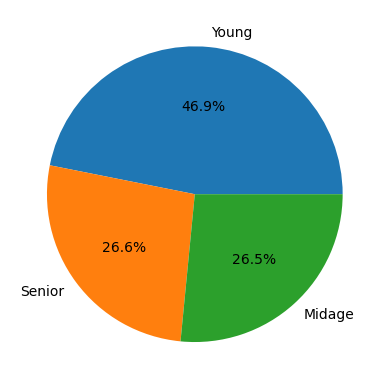

In [49]:
# creatomg pie chart and saving it 
plt.pie(ords_prods_cust_profile_grouped['age_category'].value_counts(), labels = ords_prods_cust_profile_grouped['age_category'].unique(), autopct='%1.1f%%') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_category_pie.png' ))

#### income pie chart

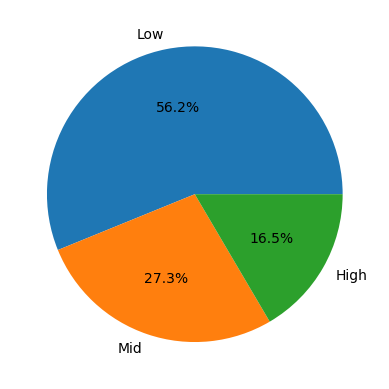

In [54]:
# income
# creatomg pie chart and saving it 
plt.pie(ords_prods_cust_profile_grouped['income_category'].value_counts(), labels = ords_prods_cust_profile_grouped['income_category'].unique(), autopct='%1.1f%%') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_category_pie.png' ))

#### alcohol pie chart

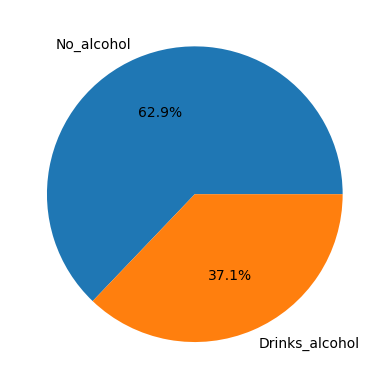

In [52]:
# creating pie chart and saving it 
plt.pie(ords_prods_cust_profile_grouped['alcohol_category'].value_counts(), labels = ords_prods_cust_profile_grouped['alcohol_category'].unique(), autopct='%1.1f%%') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'alcohol_category_pie.png' ))

#### parent flag

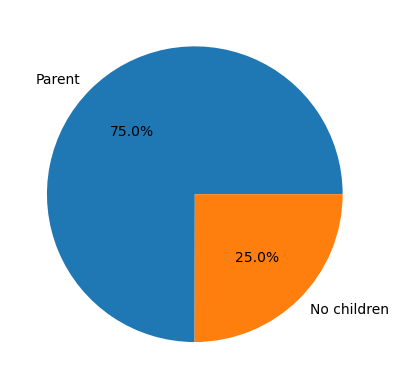

In [53]:
# creating pie chart and saving it 
plt.pie(ords_prods_cust_profile_grouped['parent_category'].value_counts(), labels = ords_prods_cust_profile_grouped['parent_category'].unique(), autopct='%1.1f%%') 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'parent_category_pie.png' ))

## Max / Mean / Min for usage freq and expenditure

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

### Age category

In [55]:
ords_prods_cust.groupby('age_category').agg({'days_since_prior_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_prior_order                prices              
                               mean  min   max       mean  min      max
age_category                                                           
Midage                    11.109019  0.0  30.0  11.989499  1.0  99999.0
Senior                    11.078983  0.0  30.0  11.768850  1.0  99999.0
Young                     11.120526  0.0  30.0  12.173973  1.0  99999.0

### Income category

In [56]:
ords_prods_cust.groupby('income_category').agg({'days_since_prior_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_prior_order                prices              
                                  mean  min   max       mean  min      max
income_category                                                           
High                         11.029419  0.0  30.0  20.186546  1.0  99999.0
Low                          11.587019  0.0  30.0   6.696985  1.0     25.0
Mid                          11.052050  0.0  30.0   8.884635  1.0  99999.0

### Alcohol category


In [57]:
ords_prods_cust.groupby('alcohol_category').agg({'days_since_prior_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_prior_order                prices              
                                   mean  min   max       mean  min      max
alcohol_category                                                           
Drinks_alcohol                10.137894  0.0  30.0  11.560303  1.0  99999.0
No_alcohol                    12.630971  0.0  30.0  12.618018  1.0  99999.0

### Parent category

In [58]:
ords_prods_cust.groupby('parent_category').agg({'days_since_prior_order': ['mean', 'min', 'max'], 'prices': ['mean', 'min', 'max']})

days_since_prior_order                prices              
                                  mean  min   max       mean  min      max
parent_category                                                           
No children                  11.080597  0.0  30.0  12.129243  1.0  99999.0
Parent                       11.111977  0.0  30.0  11.930584  1.0  99999.0

## Regional differences
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Age vs region

In [59]:
# region age difference
region_age_crosstab = pd.crosstab(ords_prods_cust_profile['region'], ords_prods_cust_profile['age_category'], dropna = False)

In [60]:
region_age_crosstab.head()

age_category,Midage,Senior,Young
region,,,
Midwest,3607237,1992375,2004404
Northeast,2635836,1555431,1537177
South,5062159,2838827,2900996
West,3911287,2196176,2193154


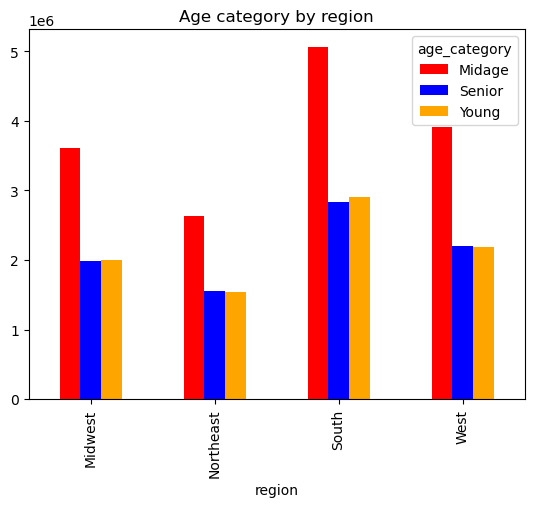

In [61]:
#creating a bar chart
region_age_crosstab.plot(kind ='bar', color = ['red', 'blue', 'orange'], title = 'Age category by region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_age_bar.png' ))

### Income vs region

In [62]:
# region income difference
region_income_crosstab = pd.crosstab(ords_prods_cust_profile['region'], ords_prods_cust_profile['income_category'], dropna = False)

In [63]:
region_income_crosstab.head()

income_category,High,Low,Mid
region,,,
Midwest,2281397,839200,4483419
Northeast,1703567,628010,3396867
South,3157338,1220859,6423785
West,2437507,909876,4953234


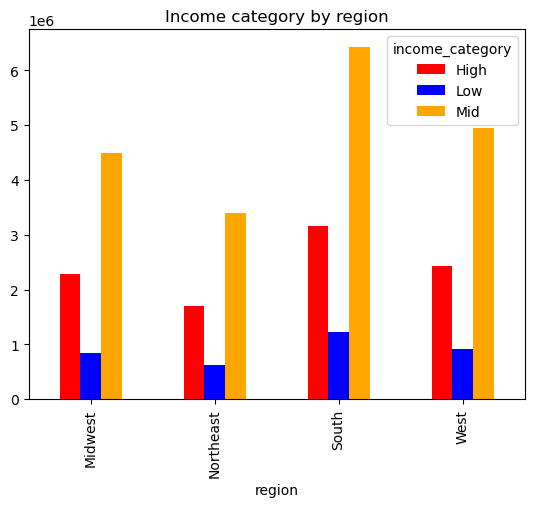

In [64]:
#creating a bar chart
region_income_crosstab.plot(kind ='bar', color = ['red', 'blue', 'orange'], title = 'Income category by region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_income_bar.png' ))

### Alcohol vs region

In [65]:
# region alcohol difference
region_alcohol_crosstab = pd.crosstab(ords_prods_cust_profile['region'], ords_prods_cust_profile['alcohol_category'], dropna = False)

In [66]:
region_alcohol_crosstab.head()

alcohol_category,Drinks_alcohol,No_alcohol
region,,
Midwest,4583185,3020831
Northeast,3453658,2274786
South,6486233,4315749
West,5032941,3267676


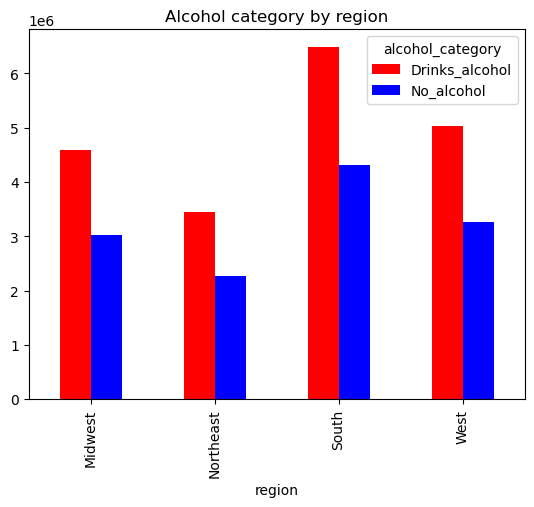

In [67]:
#creating a bar chart
region_alcohol_crosstab.plot(kind ='bar', color = ['red', 'blue', 'orange'], title = 'Alcohol category by region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_alcohol_bar.png' ))

### Parent vs region

In [68]:
# region parent difference
region_parent_crosstab = pd.crosstab(ords_prods_cust_profile['region'], ords_prods_cust_profile['parent_category'], dropna = False)

In [69]:
region_parent_crosstab.head()

parent_category,No children,Parent
region,,
Midwest,1906983,5697033
Northeast,1419716,4308728
South,2704297,8097685
West,2074349,6226268


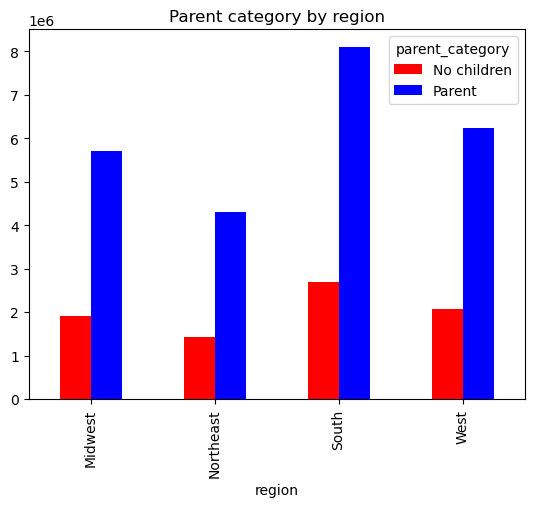

In [70]:
#creating a bar chart
region_parent_crosstab.plot(kind ='bar', color = ['red', 'blue', 'orange'], title = 'Parent category by region')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_parent_bar.png' ))